# Linear Regression From Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
# y = x*3.3234
y = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [84]:
class LinearRegression:
        
    def __init__(self, alpha, iters):
        # learning rate
        self.alpha = alpha
        # iteration
        self.iters = iters
        # parameters
        self.theta = 0
        self.theta0 = 0

    def fit(self,X,y):
        m, n = X.shape
        y = y.reshape(m,1)
        # set parameters to zero
        self.theta = np.zeros((n,1))
        self.theta0 = 0

        # predict y with the given parameters
        y_hat = np.dot(X,self.theta) + self.theta0

        cost = []
        for iter in range(self.iters):
            # gradient descent
            # find out the derivative of the gradient descent
            d1 = np.mean(X * (y_hat-y))
            d0 = np.mean((y_hat-y))
            # derivative approaches 0 as we approach the bottom of our convex
            # At the minimum, the derivative will be 0 or close to 0
            self.theta -= self.alpha*d1
            self.theta0 -= self.alpha*d0
            # predict y with new parameters
            y_hat = np.dot(X,self.theta) + self.theta0
            # find the cost function and repeat
            cost.append(np.mean((y_hat-y)**2))
            # print(cost)
        
        return self.theta[0][0], self.theta0, cost

        ## predict and score function
    def predict(self,X):
        y_pred = np.dot(X,self.theta) + self.theta0
        return y_pred

    # return r2 score
    def score(self,y, y_pred):
        # sum squared regression
        sst = np.sum((y - np.mean(y))**2)
        # total sum of squares
        ssr = np.sum((y - y_pred)**2)
        # r2 score
        r2 = 1 - ssr / sst
        return r2


In [85]:
lr = LinearRegression(0.001, 50000)
theta,theta0, cost = lr.fit(x,y)

In [80]:
y_pred = lr.predict(x)
lr.score(y, y_pred)
# r2 score of 0.92

0.9189911151822976

Text(0.5, 1.0, 'Cost vs Iteration')

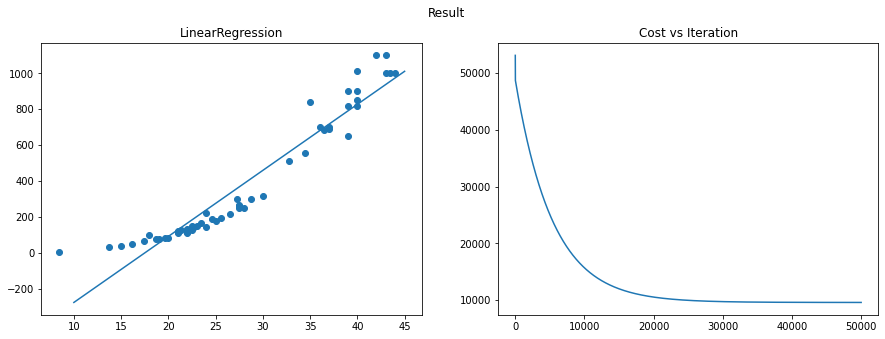

In [91]:
f,ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle('Result')
ax[0].scatter(x,y)
ax[0].plot([10,45], [10*theta+theta0, 45*theta+theta0])
ax[0].set_title('LinearRegression')

ax[1].plot([i for i in range(1,50001)], cost)
ax[1].set_title('Cost vs Iteration')